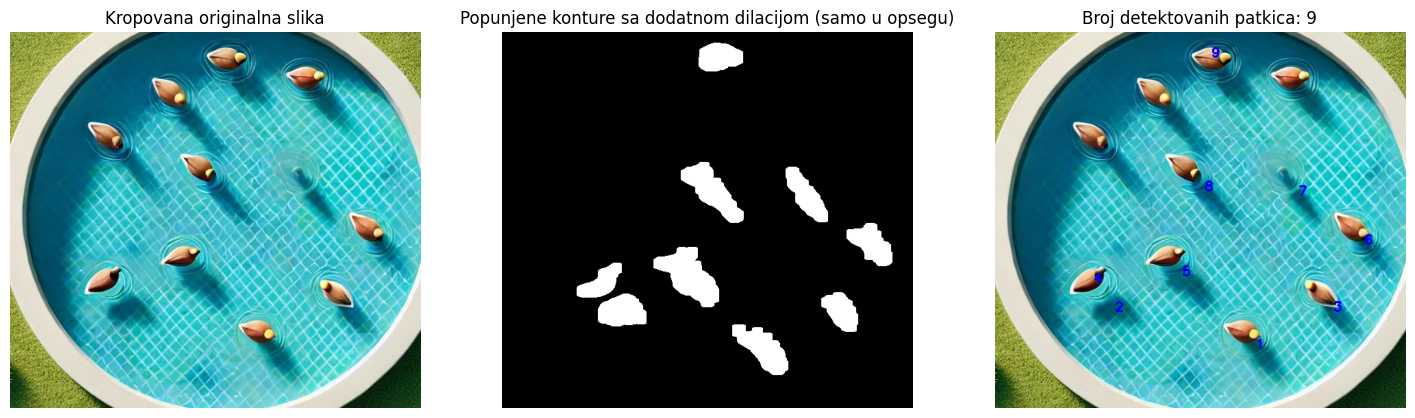

Površine svih kontura koje zadovoljavaju uslov:
Kontura 1: Površina = 3094.5
Kontura 2: Površina = 2563.0
Kontura 3: Površina = 2015.0
Kontura 4: Površina = 1775.5
Kontura 5: Površina = 4388.0
Kontura 6: Površina = 2410.0
Kontura 7: Površina = 2380.0
Kontura 8: Površina = 3495.0
Kontura 9: Površina = 2093.0
Broj detektovanih patkica u slici 'data/picture_1.jpg': 9


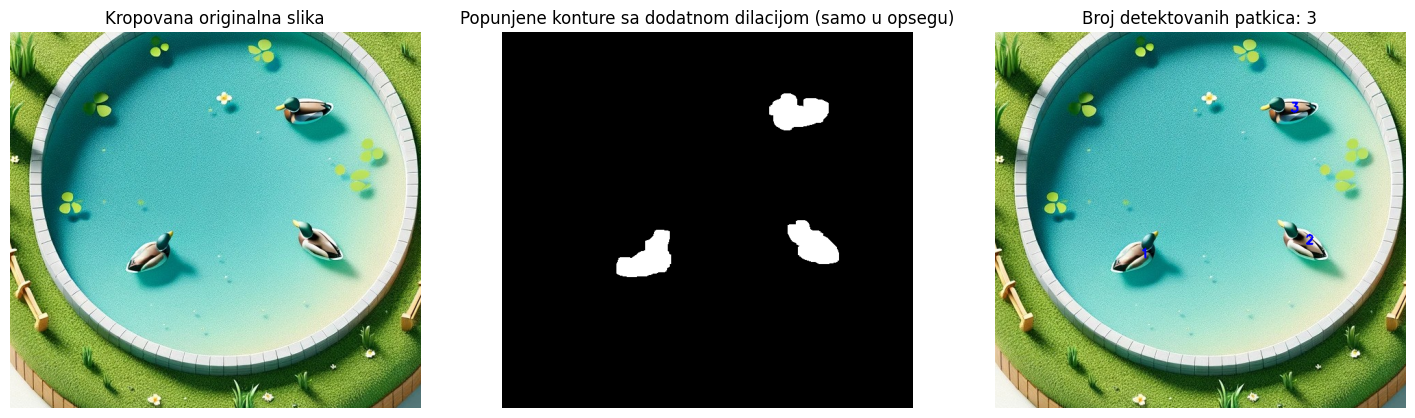

Površine svih kontura koje zadovoljavaju uslov:
Kontura 1: Površina = 3199.5
Kontura 2: Površina = 2845.5
Kontura 3: Površina = 3142.0
Broj detektovanih patkica u slici 'data/picture_2.jpg': 3


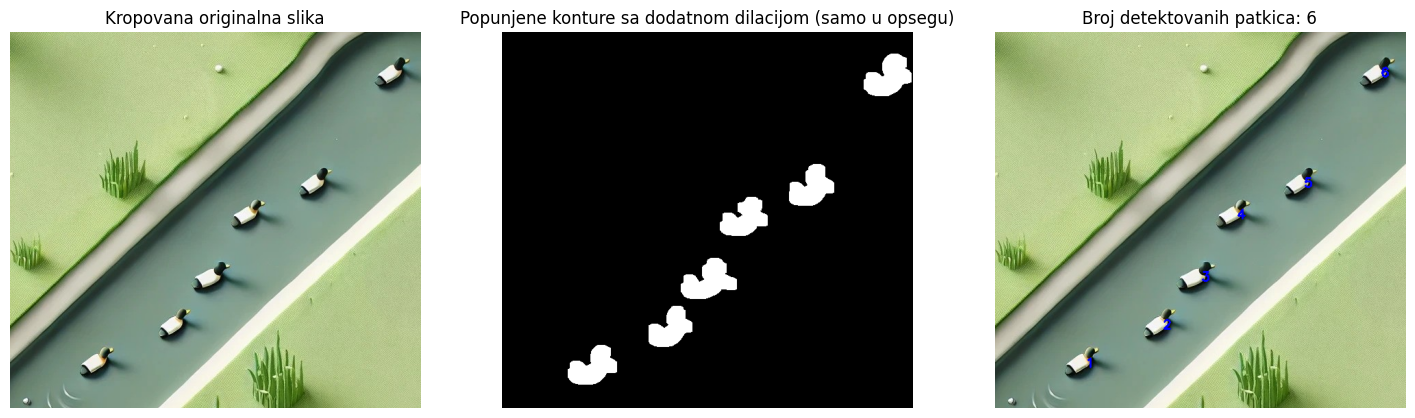

Površine svih kontura koje zadovoljavaju uslov:
Kontura 1: Površina = 2497.0
Kontura 2: Površina = 2295.5
Kontura 3: Površina = 2877.5
Kontura 4: Površina = 2484.5
Kontura 5: Površina = 2488.0
Kontura 6: Površina = 2702.5
Broj detektovanih patkica u slici 'data/picture_3.jpg': 6


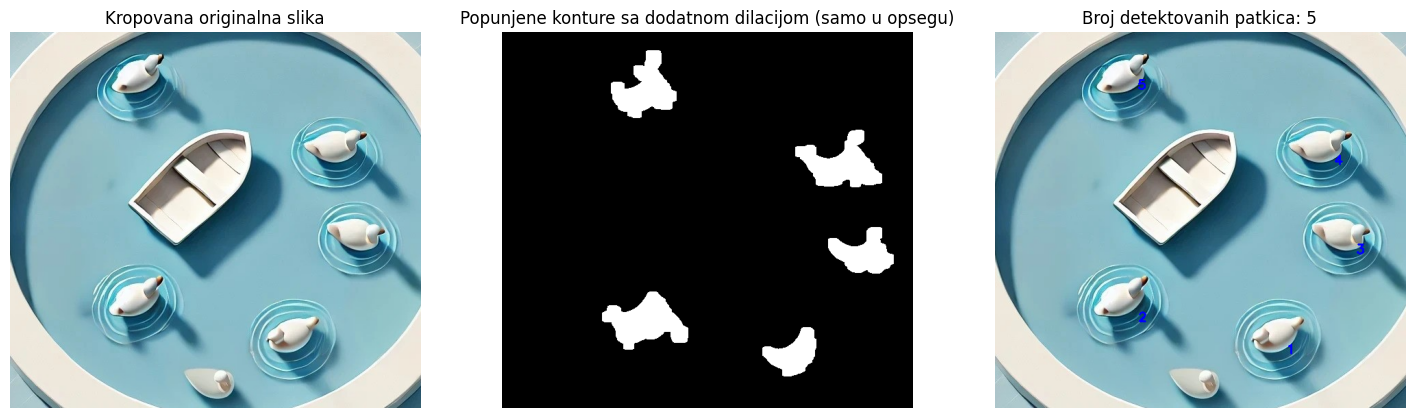

Površine svih kontura koje zadovoljavaju uslov:
Kontura 1: Površina = 3067.0
Kontura 2: Površina = 5669.0
Kontura 3: Površina = 3646.0
Kontura 4: Površina = 5374.0
Kontura 5: Površina = 4897.5
Broj detektovanih patkica u slici 'data/picture_4.jpg': 5


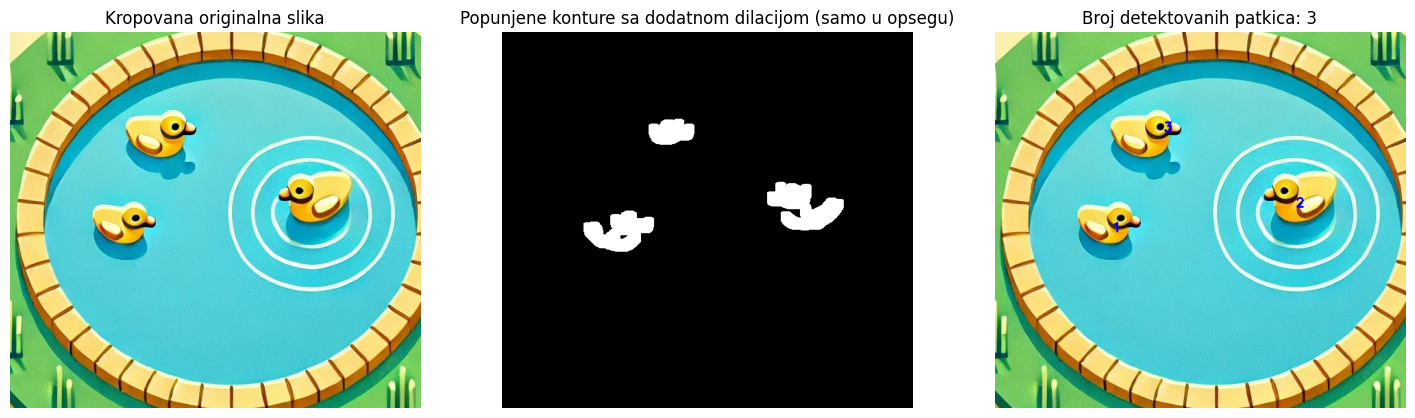

Površine svih kontura koje zadovoljavaju uslov:
Kontura 1: Površina = 3762.5
Kontura 2: Površina = 4557.5
Kontura 3: Površina = 1917.0
Broj detektovanih patkica u slici 'data/picture_5.jpg': 3


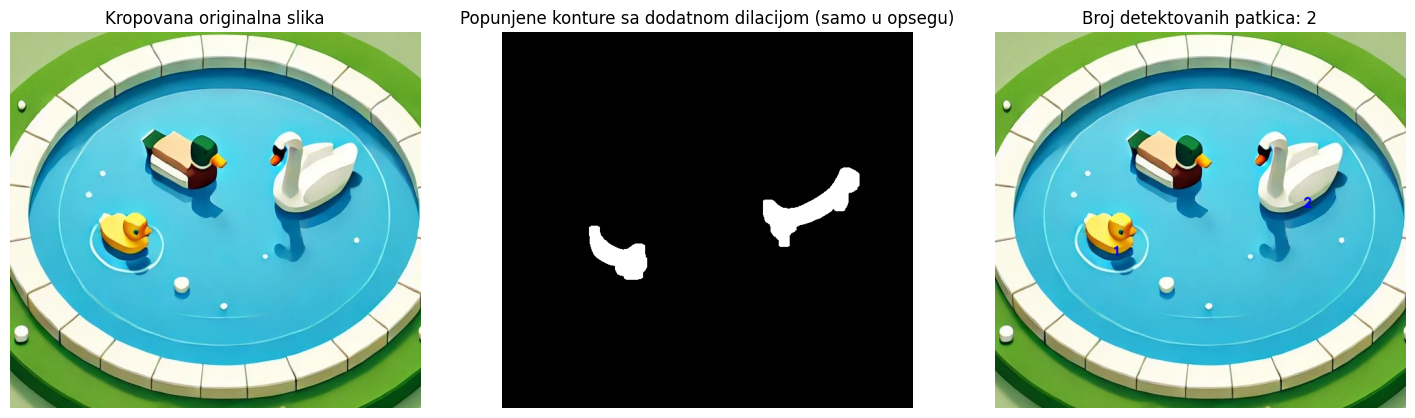

Površine svih kontura koje zadovoljavaju uslov:
Kontura 1: Površina = 3279.0
Kontura 2: Površina = 5497.0
Broj detektovanih patkica u slici 'data/picture_6.jpg': 2


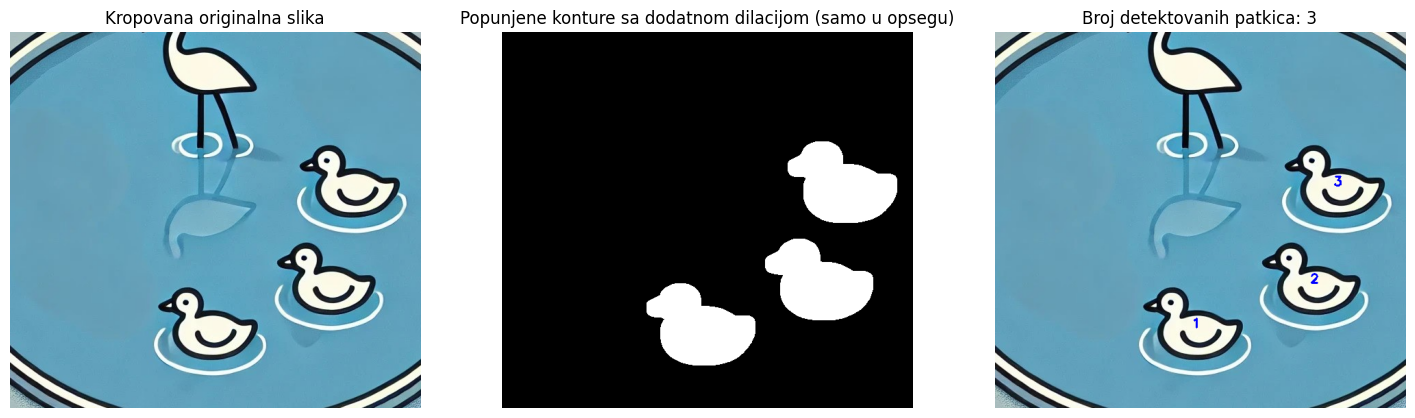

Površine svih kontura koje zadovoljavaju uslov:
Kontura 1: Površina = 12153.0
Kontura 2: Površina = 11901.5
Kontura 3: Površina = 12081.5
Broj detektovanih patkica u slici 'data/picture_7.jpg': 3


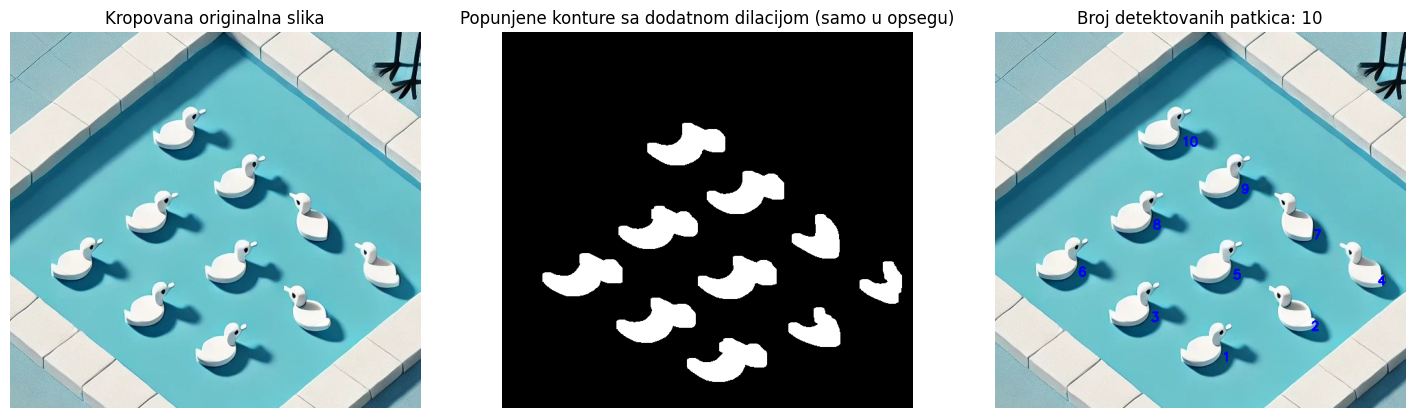

Površine svih kontura koje zadovoljavaju uslov:
Kontura 1: Površina = 4093.5
Kontura 2: Površina = 2502.5
Kontura 3: Površina = 4088.0
Kontura 4: Površina = 2050.0
Kontura 5: Površina = 4009.0
Kontura 6: Površina = 4033.5
Kontura 7: Površina = 2626.5
Kontura 8: Površina = 3991.0
Kontura 9: Površina = 3952.5
Kontura 10: Površina = 3858.5
Broj detektovanih patkica u slici 'data/picture_8.jpg': 10


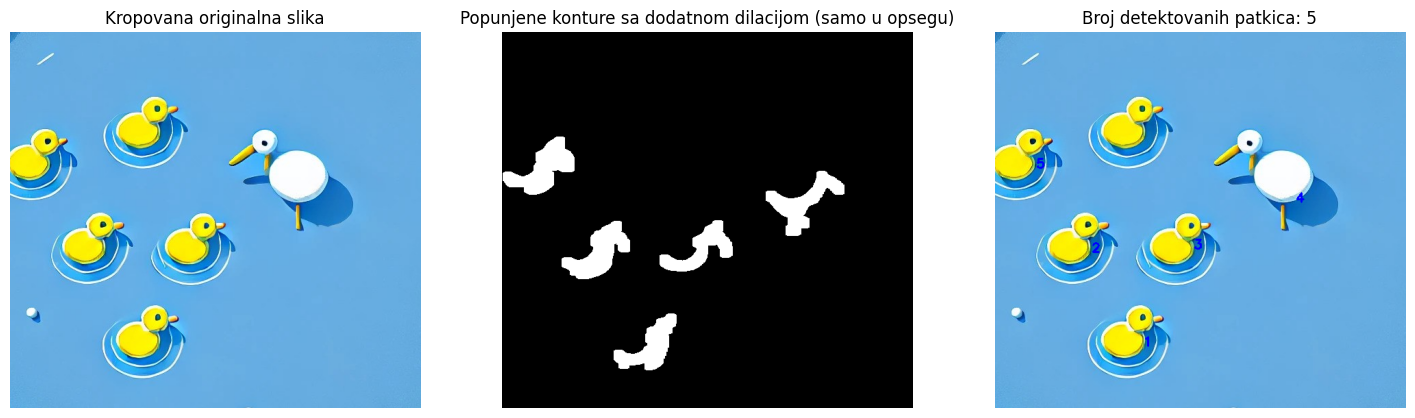

Površine svih kontura koje zadovoljavaju uslov:
Kontura 1: Površina = 3282.0
Kontura 2: Površina = 3869.0
Kontura 3: Površina = 3032.5
Kontura 4: Površina = 3681.5
Kontura 5: Površina = 3967.0
Broj detektovanih patkica u slici 'data/picture_9.jpg': 5


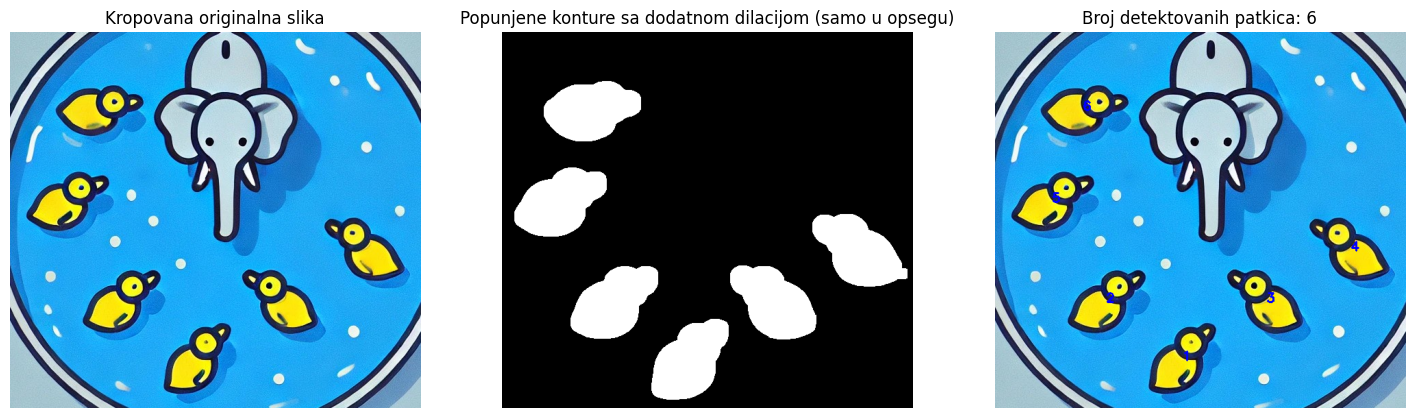

Površine svih kontura koje zadovoljavaju uslov:
Kontura 1: Površina = 8931.5
Kontura 2: Površina = 8982.5
Kontura 3: Površina = 8918.5
Kontura 4: Površina = 9144.5
Kontura 5: Površina = 9004.5
Kontura 6: Površina = 8810.5
Broj detektovanih patkica u slici 'data/picture_10.jpg': 6


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def count_ducks_with_filled_contours(image_path):
    img = cv2.imread(image_path)
    
    # Kropovanje slike (uzimanje centralnog dela)
    h, w, _ = img.shape
    crop_img = img[250:800, 200:800]  # uzimanje srednje trećine

    # Konvertovanje kropovane slike u grayscale
    grayscale_img = cv2.cvtColor(crop_img, cv2.COLOR_BGR2GRAY)

    # Binarizacija sa fiksnim pragom
    _, binary_img = cv2.threshold(grayscale_img, 80, 255, cv2.THRESH_BINARY_INV)

    # Uklanjanje šuma sa zatvaranjem kontura
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    closed_img = cv2.morphologyEx(binary_img, cv2.MORPH_CLOSE, kernel, iterations=2)

    # Detekcija ivica sa Canny
    edges = cv2.Canny(closed_img, threshold1=50, threshold2=150)

    # Dilacija na ivicama radi spajanja kontura
    dilated_edges = cv2.dilate(edges, kernel, iterations=2)
    dilated_edges = cv2.erode(dilated_edges, kernel, iterations=1)
    
    # Zatvaranje da bi se povezali obližnji regioni
    edges_closed = cv2.morphologyEx(dilated_edges, cv2.MORPH_CLOSE, kernel, iterations=1)

    # Popunjavanje kontura kako bi se formirali puni oblici
    filled_img = np.zeros_like(grayscale_img)  # Crna pozadina za popunjene konture
    contours, _ = cv2.findContours(edges_closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    filtered_contours = []
    
    for cnt in contours:
        # Popunjavamo samo konture koje zadovoljavaju uslov površine
        area = cv2.contourArea(cnt)
        if 750 < area < 2100 or 2200 < area < 5000 or 6700 < area < 7000 or 7500 < area < 10000:
            # Provera da li kontura dodiruje ivicu slike
            x, y, w, h = cv2.boundingRect(cnt)
            if x > 0 and y > 0 and x + w < filled_img.shape[1] and y + h < filled_img.shape[0]:
                # Kontura je unutar ivica slike, dodajemo je u filtrirane konture
                filtered_contours.append(cnt)
                cv2.drawContours(filled_img, [cnt], -1, 255, thickness=cv2.FILLED)

    # Dodatna dilacija sa kernelom 4x4 nakon druge filtracije
    small_kernel = np.ones((4, 4), np.uint8)
    filled_img = cv2.dilate(filled_img, small_kernel, iterations=3)

    # Pronalazak kontura na finalnoj verziji `filled_img`
    final_contours, _ = cv2.findContours(filled_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Kopija slike za prikaz kontura patkica sa oznakama
    contour_img = crop_img.copy()
    filled_contour_areas = []  # Lista za skladištenje površina kontura
    contour_labels = []  # Lista za skladištenje parova (broj, kontura)

    # Dodavanje kontura koje zadovoljavaju uslov i ispisivanje njihovih površina
    for i, cnt in enumerate(final_contours, start=1):
        area = cv2.contourArea(cnt)
        filled_contour_areas.append(area)
        contour_labels.append((i, cnt))  # Čuvamo broj konture i samu konturu

        # Pronalazak centra konture za ispisivanje broja
        M = cv2.moments(cnt)
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            cv2.putText(contour_img, str(i), (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

    # Prikazivanje slike nakon popunjavanja kontura i konačnih detekcija
    plt.figure(figsize=(18, 6))
    
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(crop_img, cv2.COLOR_BGR2RGB))
    plt.title('Kropovana originalna slika')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(filled_img, cmap='gray')
    plt.title('Popunjene konture sa dodatnom dilacijom (samo u opsegu)')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB))
    plt.title(f'Broj detektovanih patkica: {len(filled_contour_areas)}')
    plt.axis('off')

    plt.show()

    # Ispis površina svih kontura koje su prošle filter
    print("Površine svih kontura koje zadovoljavaju uslov:")
    for i, area in enumerate(filled_contour_areas, 1):
        print(f"Kontura {i}: Površina = {area}")

    # Ispis broja detektovanih patkica
    print(f"Broj detektovanih patkica u slici '{image_path}': {len(filled_contour_areas)}")

# Poziv funkcije za svaku sliku
for i in range(1, 11):
    image_path = f'data/picture_{i}.jpg'
    count_ducks_with_filled_contours(image_path)
